In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("pitch_movement _2S.csv")

print(df.shape)
print(df.keys())
df.head()

(256, 24)
Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')


,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2022,Manaea,Sean,640455,Padres,SD,L,91.2,1508,2482,...,20.7,-23.1,-2.4,-11,13.2,-14.3,-1.2,-8,0.219608,0.250980
1,2022,Valdez,Framber,664285,Astros,HOU,L,93.9,1478,3018,...,24.2,-21.1,3.0,14,14.4,-14.6,-0.2,-2,0.858824,0.415686
2,2022,Quantrill,Cal,615698,Guardians,CLE,R,93.6,1319,2920,...,16.3,-20.3,-4.0,-20,12.0,-14.0,-2.0,-14,0.109804,0.149020
3,2022,Singer,Brady,663903,Royals,KC,R,93.8,1276,2376,...,20.6,-22.5,-1.9,-8,14.9,-15.4,-0.5,-3,0.274510,0.349020
4,2022,Davies,Zach,605200,D-backs,AZ,R,89.6,1239,2292,...,21.7,-25.1,-3.5,-14,14.8,-14.9,0.0,0,0.133333,0.450980


In [10]:
del df['year']
del df['team_name']
del df['pitches_per_game']
del df['pitch_per']
del df['league_break_z']
del df['diff_z']
del df['rise']
del df['league_break_x']
del df['diff_x']
del df['tail']
del df['percent_rank_diff_z']
del df['percent_rank_diff_x']

In [11]:
df.head()
print(df.keys())

Index(['last_name', ' first_name', 'pitcher_id', 'team_name_abbrev',
       'pitch_hand', 'avg_speed', 'pitches_thrown', 'total_pitches',
       'pitch_type', 'pitch_type_name', 'pitcher_break_z', 'pitcher_break_x'],
      dtype='object')


In [12]:
df["name"] = df[" first_name"].str.cat(df["last_name"], sep=" ")

cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('name')))
df = df.reindex(columns= cols)

In [13]:
df.rename(columns={'pitcher_break_z':'vertical_break','pitcher_break_x':'horizonal_break','team_name_abbrev':'team_name'},inplace=True)

In [14]:
df.to_csv('twoseam_data.csv', index=False)

# EDA

In [15]:
df.describe()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,609432.371094,93.333594,379.187500,1408.914062,22.610156,14.795312
std,60722.233895,2.573021,276.106096,769.419323,5.100463,2.350431
min,425794.000000,86.500000,31.000000,487.000000,11.300000,4.600000
25%,573170.500000,91.700000,185.250000,815.750000,19.475000,13.400000
50%,622161.500000,93.300000,301.000000,1074.500000,21.800000,15.200000
75%,657435.000000,95.100000,497.500000,1935.000000,24.900000,16.500000
max,693821.000000,100.200000,1508.000000,3274.000000,45.700000,18.900000


In [17]:
379/1409

#n 2022, MLB pitchers threw 27% two seam fastball in average

0.2689850958126331

In [18]:
df.corr()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
pitcher_id,1.000000,0.128184,-0.022165,-0.136730,0.061522,0.056089
avg_speed,0.128184,1.000000,0.003854,-0.123723,-0.521326,0.121245
pitches_thrown,-0.022165,0.003854,1.000000,0.584448,0.036991,0.024588
total_pitches,-0.136730,-0.123723,0.584448,1.000000,-0.122817,-0.147550
vertical_break,0.061522,-0.521326,0.036991,-0.122817,1.000000,0.321040
horizonal_break,0.056089,0.121245,0.024588,-0.147550,0.321040,1.000000


<AxesSubplot:>

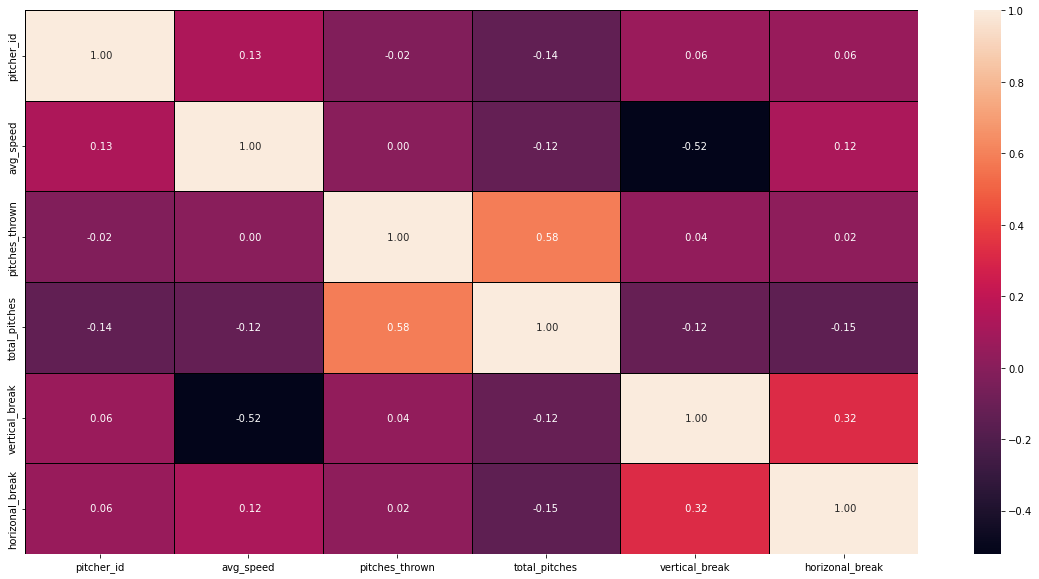

In [19]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

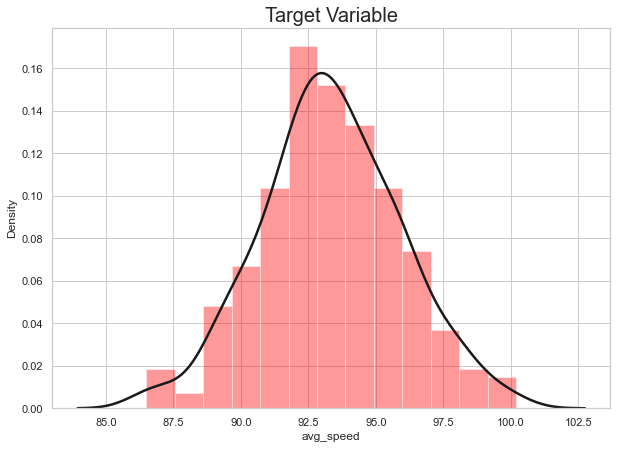

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['avg_speed'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

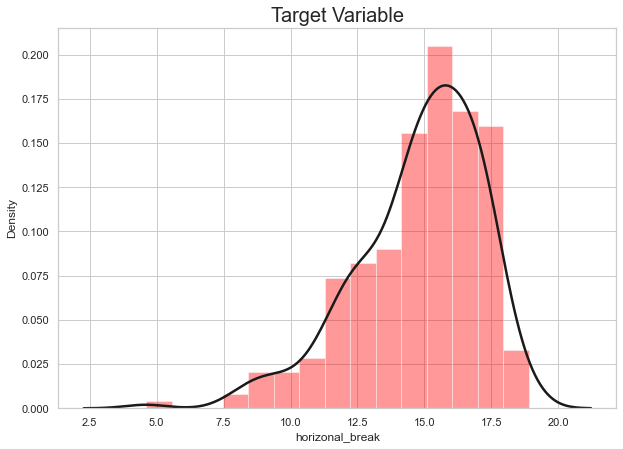

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['horizonal_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

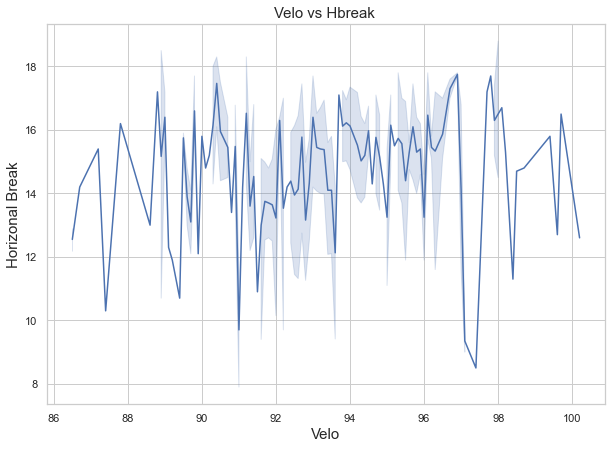

In [22]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='horizonal_break')
plt.title('Velo vs Hbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Horizonal Break',fontsize=15)
plt.show()

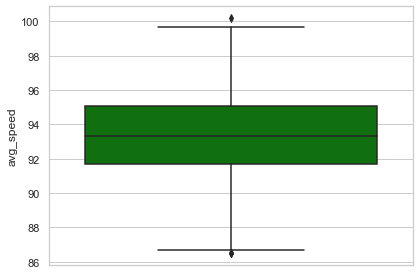

In [23]:
sns.boxplot(y=df['avg_speed'], color='green', orient='x')
plt.tight_layout()

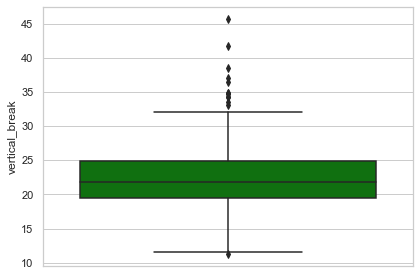

In [24]:
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

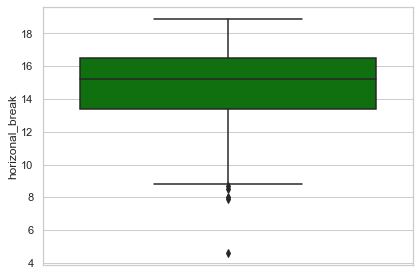

In [25]:
sns.boxplot(y=df['horizonal_break'], color='green', orient='x')
plt.tight_layout()

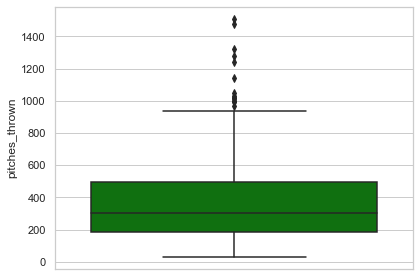

In [26]:
sns.boxplot(y=df['pitches_thrown'], color='green', orient='x')
plt.tight_layout()

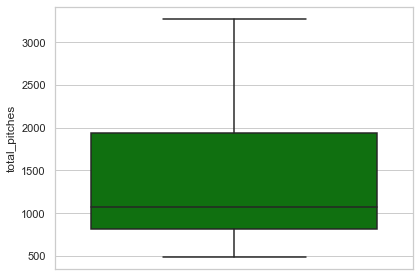

In [27]:
sns.boxplot(y=df['total_pitches'], color='green', orient='x')
plt.tight_layout()

In [28]:
#removing outlier for vertical break column
df.drop(df[df.vertical_break > 40].index, inplace=True)

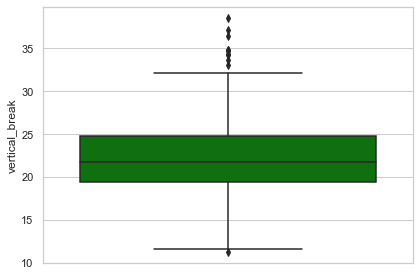

In [29]:
#redone boxplot for vertical break
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()